In [9]:
import pandas as pd
import numpy as np
from sklearn import metrics, tree
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('./bioresponse.csv')
df_x = df.drop('Activity', axis=1)
train_data, test_data, train_labels, test_labels = train_test_split(df_x, df.Activity, test_size = 0.2)
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Accuracy: 0.7603195739014648, Recall: 0.7743589743589744, precision: 0.766497461928934, f1: 0.7704081632653063, log_loss: 8.2783665966012


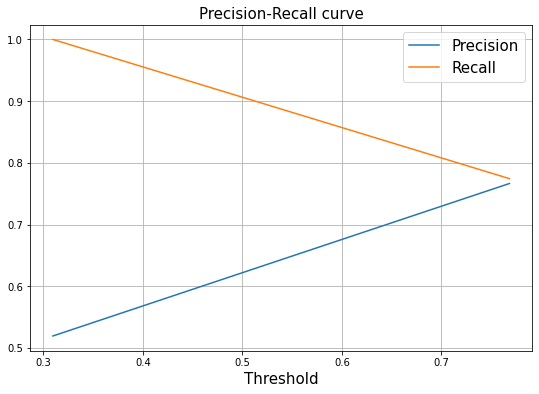

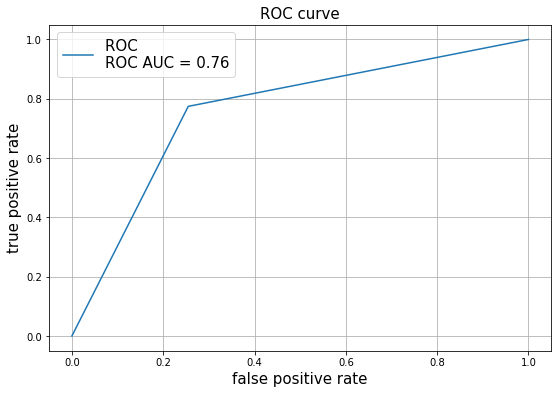

In [10]:
#Shallow Decision Tree

clf = tree.DecisionTreeClassifier(random_state=1, max_depth=1)
clf.fit(train_data, train_labels)

predictions = clf.predict(test_data)
y_probabs = clf.predict_proba(test_data)
acc = metrics.accuracy_score(test_labels, predictions)
rec = metrics.recall_score(test_labels, predictions)
roc_auc = metrics.roc_auc_score(test_labels, predictions)
prec = metrics.precision_score(test_labels, predictions)
f1 = metrics.f1_score(test_labels, predictions)
log_loss = metrics.log_loss(test_labels, predictions)

print(f'Accuracy: {acc}, Recall: {rec}, precision: {prec}, f1: {f1}, log_loss: {log_loss}')

prec, rec, thresh = precision_recall_curve(test_labels, y_probabs[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

fpr, tpr, thr = roc_curve(test_labels, y_probabs[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

Accuracy: 0.7376830892143809, Recall: 0.7692307692307693, precision: 0.7371007371007371, f1: 0.7528230865746549, log_loss: 9.060219050229607


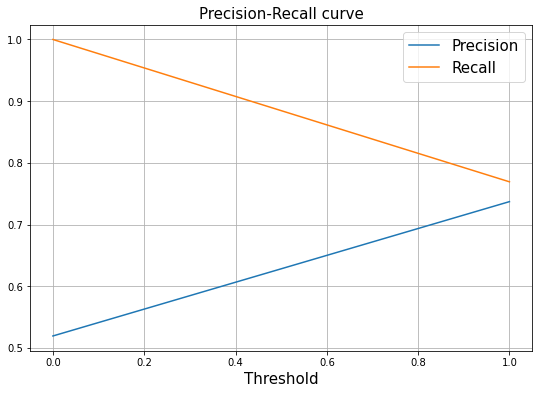

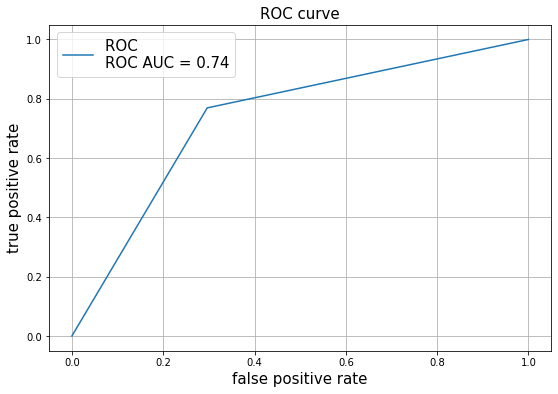

In [11]:
#Deep decision tree

deep_clf = tree.DecisionTreeClassifier(random_state=1, max_depth=1000)
deep_clf.fit(train_data, train_labels)

predictions = deep_clf.predict(test_data)
y_probabs = deep_clf.predict_proba(test_data)
acc = metrics.accuracy_score(test_labels, predictions)
rec = metrics.recall_score(test_labels, predictions)
prec = metrics.precision_score(test_labels, predictions)
roc_auc = metrics.roc_auc_score(test_labels, predictions)
f1 = metrics.f1_score(test_labels, predictions)
log_loss = metrics.log_loss(test_labels, predictions)

print(f'Accuracy: {acc}, Recall: {rec}, precision: {prec}, f1: {f1}, log_loss: {log_loss}')

prec, rec, thresh = precision_recall_curve(test_labels, y_probabs[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

fpr, tpr, thr = roc_curve(test_labels, y_probabs[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

Accuracy: 0.6537949400798935, Recall: 0.8051282051282052, precision: 0.6305220883534136, f1: 0.7072072072072071, log_loss: 11.957695058061162


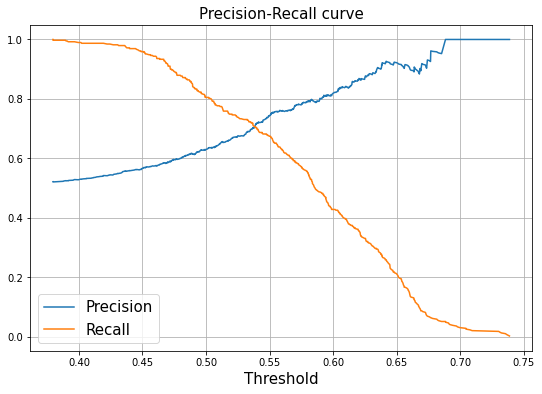

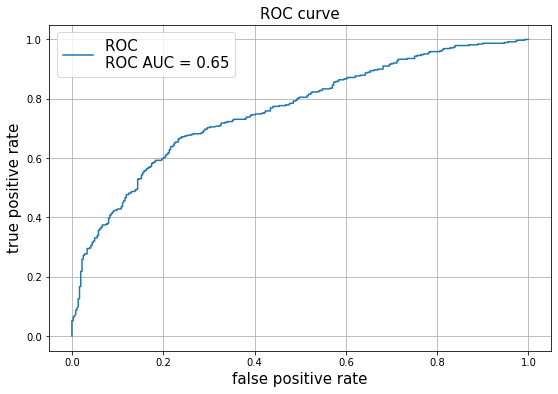

In [12]:
#RandomForest with shallow trees

rf_classifier_low_depth = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
rf_classifier_low_depth.fit(train_data, train_labels)
predictions = rf_classifier_low_depth.predict(test_data)
y_probabs = rf_classifier_low_depth.predict_proba(test_data)

acc = metrics.accuracy_score(test_labels, predictions)
rec = metrics.recall_score(test_labels, predictions)
roc_auc = metrics.roc_auc_score(test_labels, predictions)
prec = metrics.precision_score(test_labels, predictions)
f1 = metrics.f1_score(test_labels, predictions)
log_loss = metrics.log_loss(test_labels, predictions)

print(f'Accuracy: {acc}, Recall: {rec}, precision: {prec}, f1: {f1}, log_loss: {log_loss}')

prec, rec, thresh = precision_recall_curve(test_labels, y_probabs[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

fpr, tpr, thr = roc_curve(test_labels, y_probabs[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

Accuracy: 0.8055925432756325, Recall: 0.8102564102564103, precision: 0.8144329896907216, f1: 0.8123393316195373, log_loss: 6.714672336447315


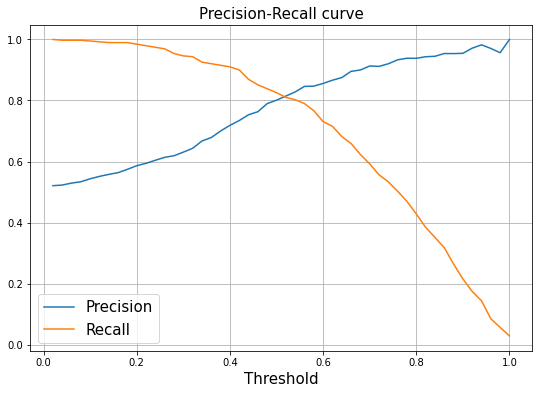

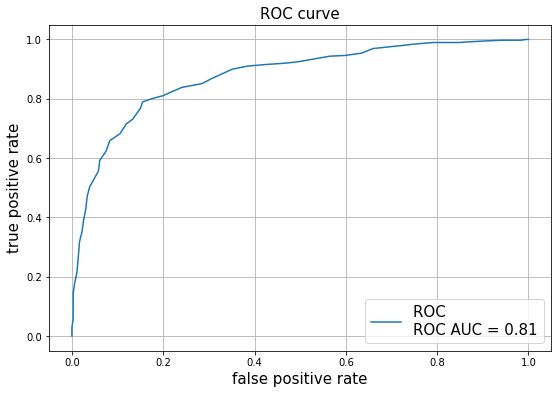

In [13]:
#RandomForest with deep trees

rf_classifier_deep = RandomForestClassifier(n_estimators = 50, max_depth = 1000, random_state = 1)
rf_classifier_deep.fit(train_data, train_labels)
predictions = rf_classifier_deep.predict(test_data)
y_probabs = rf_classifier_deep.predict_proba(test_data)

acc = metrics.accuracy_score(test_labels, predictions)
rec = metrics.recall_score(test_labels, predictions)
prec = metrics.precision_score(test_labels, predictions)
roc_auc = metrics.roc_auc_score(test_labels, predictions)
f1 = metrics.f1_score(test_labels, predictions)
log_loss = metrics.log_loss(test_labels, predictions)

print(f'Accuracy: {acc}, Recall: {rec}, precision: {prec}, f1: {f1}, log_loss: {log_loss}')

prec, rec, thresh = precision_recall_curve(test_labels, y_probabs[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'Precision-Recall curve',fontsize = 15)
plt.legend(fontsize = 15)

fpr, tpr, thr = roc_curve(test_labels, y_probabs[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC curve",fontsize = 15)
plt.legend(fontsize = 15)

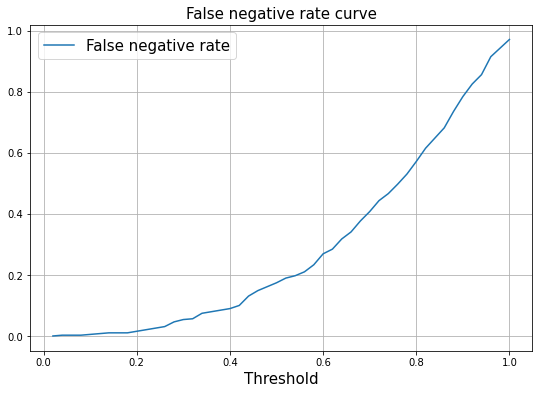

In [14]:
# Classifier which avoids false negatives
# We need to optimize the code to find the highest value for false negative rate
# false negative rate = 1 - true positive rate(recall)

rf_classifier_deep = RandomForestClassifier(n_estimators = 50, max_depth = 1000, random_state = 1)
rf_classifier_deep.fit(train_data, train_labels)
predictions = rf_classifier_deep.predict(test_data)
y_probabs_omit_negatives = rf_classifier_deep.predict_proba(test_data)

prec, rec, thresh = precision_recall_curve(test_labels, y_probabs_omit_negatives[:,1])
plt.figure(figsize=(9, 6))
plt.grid()
plt.plot(thresh, 1 - rec[:-1], label="False negative rate")
plt.xlabel(u"Threshold",fontsize = 15)
plt.title(u'False negative rate curve',fontsize = 15)
plt.legend(fontsize = 15)


In [18]:
#Select a threshold equal to 0.2

df_custom_threshold = np.where(y_probabs_omit_negatives[:, 1] >= 0.2, 1, 0)

acc = metrics.accuracy_score(test_labels, df_custom_threshold)
rec = metrics.recall_score(test_labels, df_custom_threshold)
prec = metrics.precision_score(test_labels, df_custom_threshold)
roc_auc = metrics.roc_auc_score(test_labels, df_custom_threshold)
f1 = metrics.f1_score(test_labels, df_custom_threshold)
log_loss = metrics.log_loss(test_labels, df_custom_threshold)

print(f'Accuracy: {acc}, Recall: {rec}, precision: {prec}, f1: {f1}, log_loss: {log_loss}')

Accuracy: 0.6311584553928096, Recall: 0.9846153846153847, precision: 0.5862595419847328, f1: 0.7349282296650719, log_loss: 12.739624170830682
